(np.int64(251), np.int64(97)) (np.int64(799), np.int64(527))


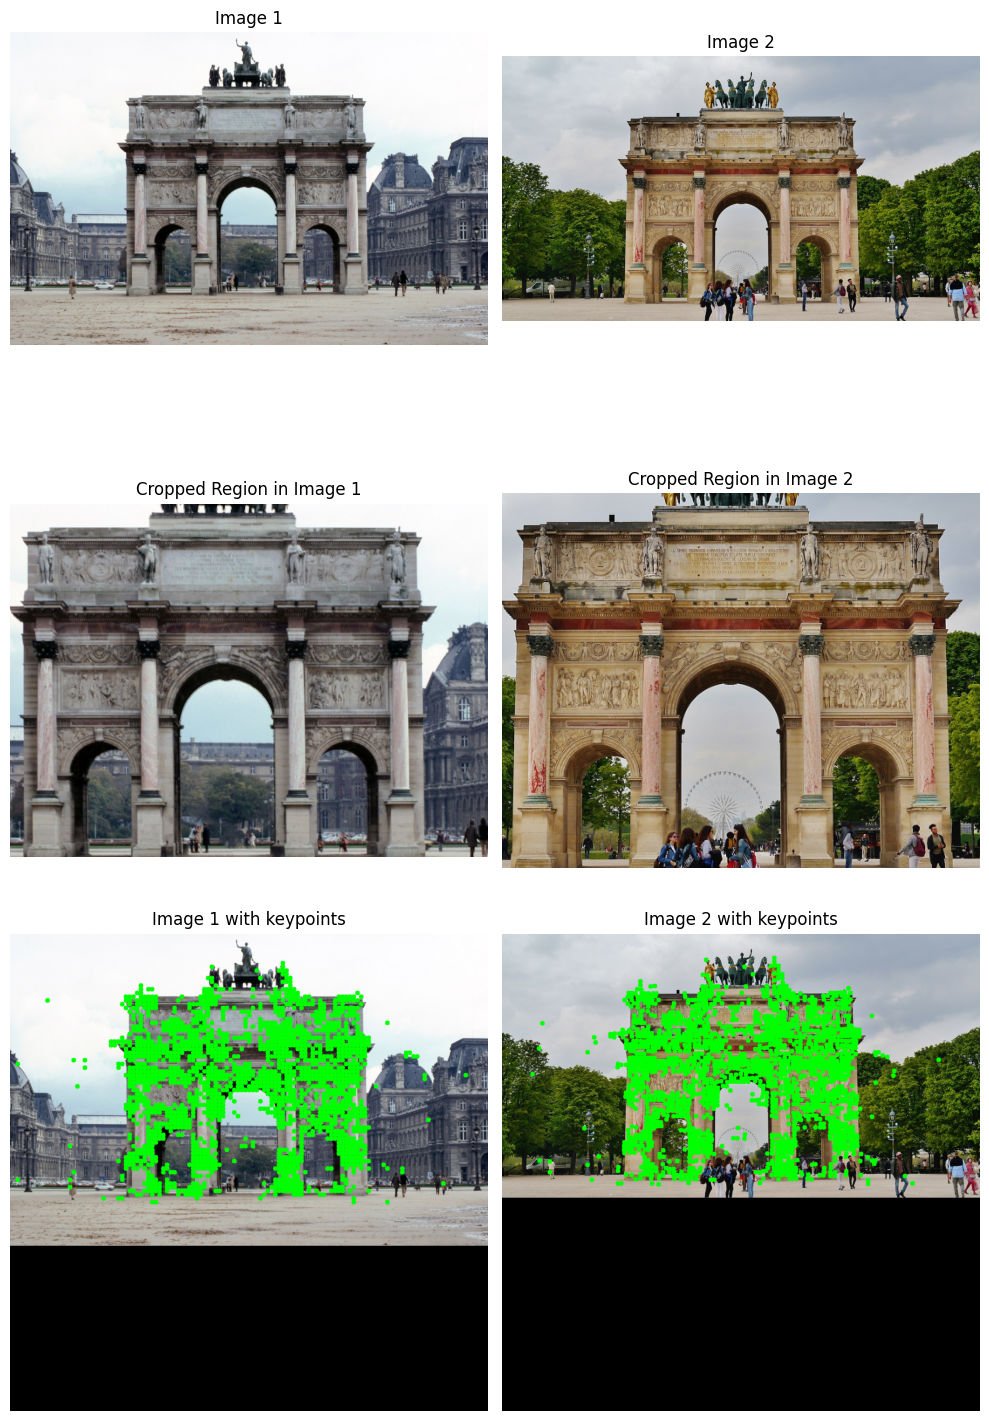

In [4]:
from utils import *
import matplotlib.pyplot as plt

# Step 1: Take any pair of images of an object
obj = 'Arc_de_Triomphe_du_Carrousel_by_angle'
path_to_pair_metadata_train = 'data/pairs_metadata/doppelgangers/pairs_metadata/train_pairs_noflip.npy'

pair = get_pairs_train(path_to_pair_metadata_train, obj)[0]

# Step 2: Get the keypoints location of the pair
parent_path_keypoints_location = 'data/matches_train_noflip/doppelgangers/loftr_matches/train_set_noflip/'
keypoints_location = get_keypoints_location_pair(parent_path_keypoints_location, pair[1])

# Step 3: take each image of the pair
root_path_images = 'data/train_set_noflip/doppelgangers/images/train_set_noflip/'
image1, image2 = get_images(pair[0], root_path_images)

# Step 4: resize and padding to 1024x1024 and crop according to keypoints
image1_process = resize_and_pad_bottom_right(image1)
image2_process = resize_and_pad_bottom_right(image2)

crop1, crop2 = crop_matched_regions(image1_process, image2_process, **keypoints_location, threshold=0.6)

image1_with_keypoints = write_keypoints_to_image(image1_process, keypoints_location['kpt0'])
image2_with_keypoints = write_keypoints_to_image(image2_process, keypoints_location['kpt1'])

# List of images and titles
images = [
    (image1, "Image 1"),
    (image2, "Image 2"),
    (crop1, "Cropped Region in Image 1"),
    (crop2, "Cropped Region in Image 2"),
    (image1_with_keypoints, "Image 1 with keypoints"),
    (image2_with_keypoints, "Image 2 with keypoints"),
]

# show images
plt.figure(figsize=(10, 15))
for i, (img, title) in enumerate(images, 1):
    plt.subplot(3, 2, i)
    plt.imshow(img)
    plt.axis('off')
    plt.title(title)

plt.tight_layout()
plt.show()
